In [ ]:
# Lab Assignment 1
# Lily Caza

In [2]:
# Exercise 1 - Run the diagnostic code and include the cell output in your notebook.
import tclab

print("Version = ", tclab.__version__)
tclab.diagnose()

Version =  0.4.9

Checking connection
-------------------
Looking for Arduino on any port...
Arduino Leonardo found on port COM3

Testing TCLab object in debug mode
----------------------------------
TCLab version 0.4.9
Sent: "Q1 0"
Return: "0.000"
Sent: "VER"
Return: "TCLab Firmware 3.0.0 Arduino Leonardo/Micro"
Arduino Leonardo connected on port COM3 at 115200 baud.
TCLab Firmware 3.0.0 Arduino Leonardo/Micro.
Sent: "Q2 0"
Return: "0.000"
Reading temperature
Sent: "T1"
Return: "46.035"
46.035
Sent: "Q1 0"
Return: "0.000"
Sent: "Q2 0"
Return: "0.000"
Sent: "X"
Return: "Stop"
TCLab disconnected successfully.

Testing TCLab functions
-----------------------
TCLab version 0.4.9
Arduino Leonardo connected on port COM3 at 115200 baud.
TCLab Firmware 3.0.0 Arduino Leonardo/Micro.
Testing LED. Should turn on for 10 seconds.
Countdown: 0  

Reading temperatures
T1 = 43.747 °C, T2 = 28.633 °C

Writing fractional value to heaters...
We wrote Q1 = 0.5, and read back Q1 = 0.5

We will now turn on

In [ ]:
# Exercise 2 - Using the Historian to save your data, and Plotter to display your data, perform a step change on Heater 1, 
# raising the power input from 0% to 60% of full power. 

TCLab version 0.4.9
Arduino Leonardo connected on port COM3 at 115200 baud.
TCLab Firmware 3.0.0 Arduino Leonardo/Micro.


<IPython.core.display.Javascript object>


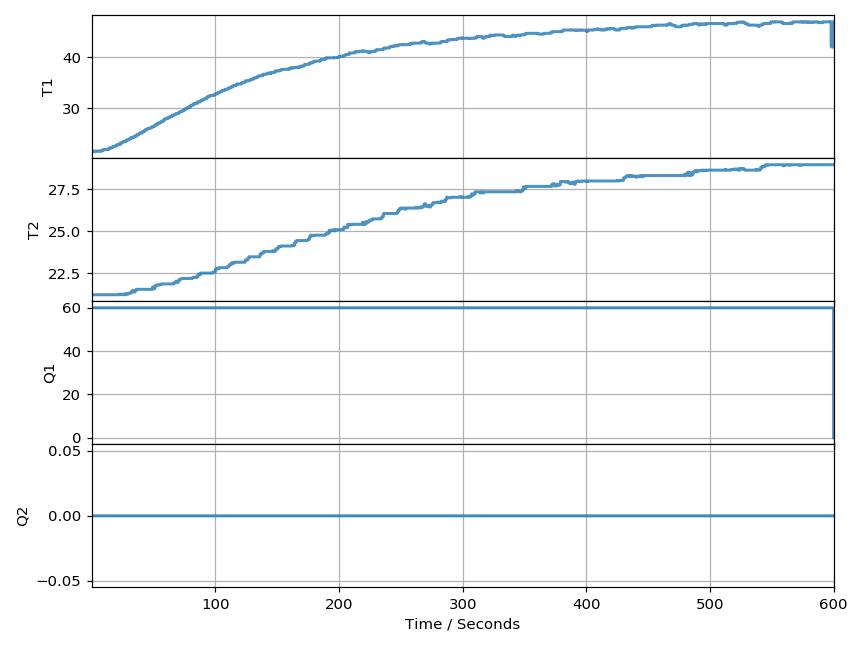

TCLab disconnected successfully.


In [1]:
# Collect the data and plot the results

%matplotlib notebook

from tclab import TCLab, clock, Historian, Plotter

with TCLab() as lab:
    h = Historian(lab.sources)
    p = Plotter(h, 600)
    for t in clock(600):
        lab.Q1(60 if t <= 600 else 0)
        p.update(t)
        
h.to_csv('data.csv')


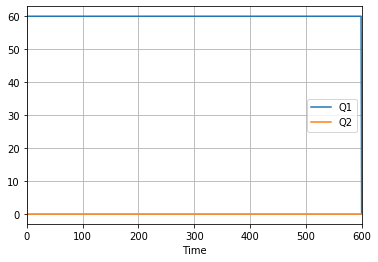

In [15]:
# Plot the heaters' % power data
%matplotlib inline

import pandas as pd
data = pd.read_csv('data.csv')
data.index = data['Time']
data[['Q1','Q2']].plot(grid=True)

In [25]:
# Exercise 3 - Examine the step test results for T1. Estimate:

# CHARACTERISTIC TIME CONSTANT

T_ss = 49          # steady-state temp. deg. C
T_amb = 21         # ambient temp. deg. C
temp_diff = 49-21  # temperature range
print('The range of temperatures between ambient and steady-state temperature is:',temp_diff,'deg. C')
print('')

# the characteristic time constant occurs at approximately 63.2% of the range
percent_of_diff = 0.632*temp_diff
print('63.2% of the range is',round(percent_of_diff,2),'deg. C.') 
print('')
temp_of_tau = T_amb + percent_of_diff
print('The time constant corresponds to a T1 temperature of:',round(temp_of_tau,1),'deg. C')
print('')

# To find the characteristic time constant, read the time at which the temperature reaches 63.2% of the range from 
# ambient to steady-state temperature
tau = 145.0 # seconds
print('The characteristic time constant for T1 is approximately',tau,'seconds.')
print('')

# HALF-LIFE

# the range of temperature values for T1 is approximately 25 degrees celsius
# the half-life time occurs at approximately 69.3% of the characteristic time constant

half_life = 0.693*tau

print('The half-life for T1 is approximately',round(half_life,1),'seconds.')
print('')


# SYSTEM GAIN (Be careful. Remember to subtract the ambient temperature to get actual temperature rise due to heating.)

# the system gain is estimated from the graph as:
# gain = difference in temperature (steady-state - ambient)/ power

ss_temp = 49-21 # deg. C
percent_power = 60 # % max power
K = ss_temp/percent_power

print('The system gain is equal to',round(K,3),'deg. C/% max power.')

The range of temperatures between ambient and steady-state temperature is: 28 deg. C

63.2% of the range is 17.7 deg. C.

The time constant corresponds to a T1 temperature of: 38.7 deg. C

The characteristic time constant for T1 is approximately 145.0 seconds.

The half-life for T1 is approximately 100.5 seconds.

The system gain is equal to 0.467 deg. C/% max power.


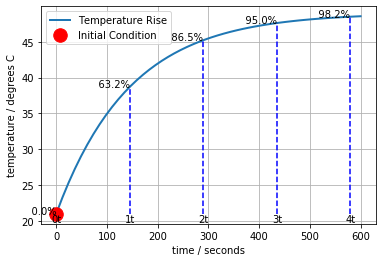

In [22]:
# Use the estimated parameters to create a simulation of the heater temperature, and compare to the measured results.
# Code manipulated from book 2.02 part 2.2.4 Response to a step input

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# system data
a = -1/tau
b = -K*a
U = 60 # U is constant for t>=0

t0 = 0.0
x0 = 0.0 # initial temp

t = np.linspace(t0, t0 + 600)
x = 21 + x0*np.exp(a*(t-t0)) - (b*U/a)*(1 - np.exp(a*(t-t0)))


fig, ax = plt.subplots(1, 1)
ax.plot(t,x,label="Temperature Rise", lw=2)
ax.plot(t0, x0+21, 'r.', ms=27, label="Initial Condition")
ax.set_xlabel("time / seconds")
ax.set_ylabel("temperature / degrees C")
ax.legend()

for k in range(0, 5):
    t = t0 + k*tau
    x = 21 + x0*np.exp(a*(t-t0)) - (b*U/a)*(1 - np.exp(a*(t-t0)))
    ax.plot([t, t], [x0+21, x], "b--")
    ax.text(t, x0+21, f"{k}t", va="top", ha="center")  # va/ha = vertical/horizontal alignment
    ax.text(t, x, f"  {100*(1-np.exp(-k)):5.1f}%", ha="right")
ax.grid(True)


In [14]:
# Exercise 4 - Examine the data for the response of temperature T2 due to a step change in heater 1. 

# Does that appear to be the response of a first-order linear system? 

    # The response does not appear to be that of a first-order linear system. It appears to have an 
    # inflection point at the beginning of the response, although it should start out with a finite slope.

# How does it differ? 

    # T2 differs because the trend seems more linear and the data has a lot of noise 
    # and has small fluctuations.

# Can you still estimate a gain?
    
    # I can still estimate a gain as the temperature rise over the energy of Q1 which gives:
gain_T2 = (29-21)/60 
    # However, T2 does not seem to reach a steady-state like T1 does, so using the maximum temperature reached is an estimation.
print('The gain for T2 is estimated as:',round(gain_T2,3))

The gain for T2 is estimated as: 0.133
